In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import beta
import timeit
from scipy.optimize import minimize

# The true distribution
We take the true distribution of $y$ to be $\mathcal{Beta}(3,3)$ drawn on $[-1,1]$. i.e. we have unormalized density
<br>
<center> $(1+y)^2(1-y)^2$

We seek to find $x^*$ such that it solves $\min_x E[c(x,y)]$ where
<br>
<center>$c(x,y) = 3x^2 + 6xy^2 - 2x^2y - 7xy$.

This can be solved analytically, whereby $x$ is minimised at $-1/7$ = -0.14286.

In [2]:
# the cost function we would like to minimise
def f(x,y):
    return np.mean(3*(x**2) + 6*x*(y**2) - 2*(x**2)*y - 7*x*y,axis=0)

In [3]:
# the cost function we would like to minimise
def f2(x,y):
    return np.mean(3*(x**2) + 6*x*y**2 - 2*x**2*y - 7*x*y - 5*x,axis=0)

Text(0.5,1,'True Distribution of Y')

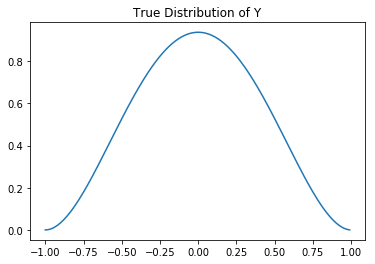

In [4]:
# Define the true distribution
Y = beta(a = 3,b=3,loc=-1,scale=2)

# plot the pdf within the range
x = np.arange (-1, 1, 0.01)
z = Y.pdf(x)
plt.plot(x,z)
plt.title("True Distribution of Y")

In [38]:
# Some experimental hyper parameters

# number of iterations to perform each experiment
n_iter = 10000

# number of samples for each experiment
# we use 50, 100, 150...., 5000 samples
N = [50,200, 800,3200]

In [39]:
def SSA_minimise(samples, func, p0=-1.0/7):
    res = minimize(func,p0,args=(samples),method='Nelder-Mead')
    return res.x

In [40]:
def KDE_minimise(samples, bandwidth, func, p0=-1.0/7, n_sample=20000):
    # fit using kde
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(np.reshape(samples,(-1,1)))
    
    # sample from fitted distribution
    KDE_samples = kde.sample(n_sample)
    
    # minimise the function
    res = minimize(func,p0,args=(KDE_samples),method='Nelder-Mead')
    return res.x

In [41]:
# bandwidths for kde
bandwidth = [0.005,0.01,0.02,0.03]

In [42]:
SSA_results = np.zeros((n_iter,len(N)))
KDE_results = np.zeros((n_iter,len(N),len(bandwidth)))

start_time = timeit.default_timer()

for k in range(n_iter):
    for j in range(len(N)):
        # obtain the samples
        S = Y.rvs(N[j])
    
        SSA_results[k,j] = SSA_minimise(S,f)
        for i in range(len(bandwidth)):
            KDE_results[k,j,i] = KDE_minimise(S, bandwidth[i], f)
        
elapsed = timeit.default_timer() - start_time
print("This has taken %.2f seconds") %elapsed

This has taken 553.23 seconds


Text(0.5,1,'Obtained x* for different gaussian bandwidths')

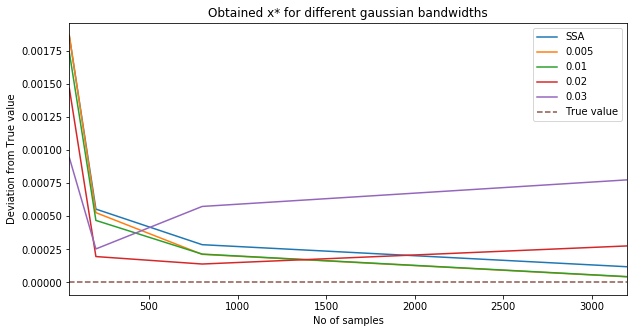

In [43]:
plt.figure(figsize=(10,5))
lineObjects = plt.plot(N,np.abs(np.mean(SSA_results,axis=0)+1.0/7),label='SSA approximation')
lineObjects += plt.plot(N,np.abs(np.mean(KDE_results,axis=0)+1.0/7))
lineObjects += plt.plot(N,[0.0]*len(N),'--',label='True value')
plt.xlabel('No of samples')
plt.ylabel('Deviation from True value')
#plt.axvline(x=50,linestyle= '--')
#plt.axvline(x=200,linestyle= '--')
#plt.axvline(x=800,linestyle= '--')
plt.xlim([50,3200])
strings = [str(ele) for ele in bandwidth]
plt.legend(lineObjects,tuple(['SSA'] + strings + ['True value']))
plt.title('Obtained x* for different gaussian bandwidths')

In [44]:
np.argmin(np.abs(np.mean(KDE_results,axis=0)+1.0/7),axis=1)

array([3, 2, 2, 0])

best bandwidths: 
    1. N = 50: 0.05
    2. N = 200: 0.02
    3. N = 800: 0.02
    4. N = 3200: 0.005

In [54]:
# bandwidths for kde
bandwidth = [0.04,0.05,0.06]

In [55]:
SSA_results = np.zeros((n_iter,len(N)))
KDE_results = np.zeros((n_iter,len(N),len(bandwidth)))

start_time = timeit.default_timer()

for k in range(n_iter):
    for j in range(len(N)):
        # obtain the samples
        S = Y.rvs(N[j])
    
        SSA_results[k,j] = SSA_minimise(S,f)
        for i in range(len(bandwidth)):
            KDE_results[k,j,i] = KDE_minimise(S, bandwidth[i], f)
        
elapsed = timeit.default_timer() - start_time
print("This has taken %.2f seconds") %elapsed

This has taken 433.97 seconds


Text(0.5,1,'Obtained x* for different gaussian bandwidths')

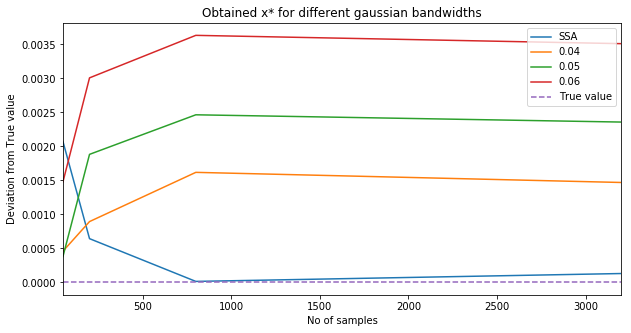

In [56]:
plt.figure(figsize=(10,5))
lineObjects = plt.plot(N,np.abs(np.mean(SSA_results,axis=0)+1.0/7),label='SSA approximation')
lineObjects += plt.plot(N,np.abs(np.mean(KDE_results,axis=0)+1.0/7))
lineObjects += plt.plot(N,[0.0]*len(N),'--',label='True value')
plt.xlabel('No of samples')
plt.ylabel('Deviation from True value')
#plt.axvline(x=50,linestyle= '--')
#plt.axvline(x=200,linestyle= '--')
#plt.axvline(x=800,linestyle= '--')
plt.xlim([50,3200])
strings = [str(ele) for ele in bandwidth]
plt.legend(lineObjects,tuple(['SSA'] + strings + ['True value']))
plt.title('Obtained x* for different gaussian bandwidths')

In [57]:
np.argmin(np.abs(np.mean(KDE_results,axis=0)+1.0/7),axis=1)

array([1, 0, 0, 0])